In [6]:
import numpy as np
from lab1.plot import plotter
import methods

In [7]:
np.random.seed(12)


def generate_points(n, dim, f):
    X = np.random.rand(n, dim)
    y = []
    X_err = X + 0.2 * np.random.randn(n, dim)
    for x in X_err:
        y.append(f(x))
    return X, np.asarray(y)


def mse(X, y, w):
    res = 0
    for i in range(0, len(y)):
        x = 0
        for j in range(0, len(X[i])):
            x += X[i][j] * w[j]
        res += np.square(y[i] - x)
    return res / len(y)


def mse_func(X, y):
    return lambda w: mse(X, y, w)


def grad_calculator(x, func, n):
    h = 1e-5
    res = []
    for i in range(n):
        delta = np.zeros(n)
        delta[i] = h
        res.append((func(x + delta) - func(x - delta)) / (2 * h))
    return np.asarray(res)


def grad_func(f, n):
    return lambda x: grad_calculator(x, f, n)

In [8]:
n = 1000
dim = 2
(X, y) = generate_points(n, dim, lambda x: 5 * x[0] + 2 * x[1])
f = mse_func(X, y)
grad = grad_func(f, dim)

In [9]:
def print_info(name, start, points, grad_calc, func_calc):
    print("start:", start)
    print("{}:".format(name))
    print(points[-1], f(points[-1]))
    print("gradient calculations:", grad_calc)
    print("function calculations:", func_calc)


def plot_from_start(start):
    lr = learning_rate = lambda x: 2

    (points1, grad_calc1, func_calc1) = methods.sgd_with_momentum(f, grad, start, learning_rate=lr)
    print_info("Momentum", start, points1, grad_calc1, func_calc1)

    (points2, grad_calc2, func_calc2) = methods.sgd_nesterov(f, grad, start, learning_rate=lr)
    print_info("Nesterov", start, points2, grad_calc2, func_calc2)

    (points3, grad_calc3, func_calc3) = methods.sgd_adagrad(f, grad, start, learning_rate=lr)
    print_info("AdaGrad", start, points3, grad_calc3, func_calc3)

    (points4, grad_calc4, func_calc4) = methods.sgd_rmsprop(f, grad, start, learning_rate=lr)
    print_info("RMSProp", start, points4, grad_calc4, func_calc4)

    (points5, grad_calc5, func_calc5) = methods.sgd_adam(f, grad, start, learning_rate=lr)
    print_info("Adam", start, points5, grad_calc5, func_calc5)

    plotter.multiple_points_over_contour(f, points1, points2, name1="Momentum", name2="Nesterov").show()

    plotter.multiple_points_over_contour(f, points4, points3, name1="RMSProp", name2="AdaGrad",).show()

    plotter.multiple_points_over_contour(f, points5, name1="Adam").show()

start: [0, 0]
Momentum:
[4.99991509 1.9847715 ] 1.0445438605837027
gradient calculations: 257
function calculations: 0
start: [0, 0]
Nesterov:
[4.99990966 1.98477235] 1.0445438605771455
gradient calculations: 133
function calculations: 0
start: [0, 0]
AdaGrad:
[4.99988198 1.98479923] 1.044543860716619
gradient calculations: 226
function calculations: 0
start: [0, 0]
RMSProp:
[4.99990757 1.98477438] 1.0445438605785937
gradient calculations: 54
function calculations: 0
start: [0, 0]
Adam:
[4.9999158  1.98477337] 1.0445438605920836
gradient calculations: 266
function calculations: 0


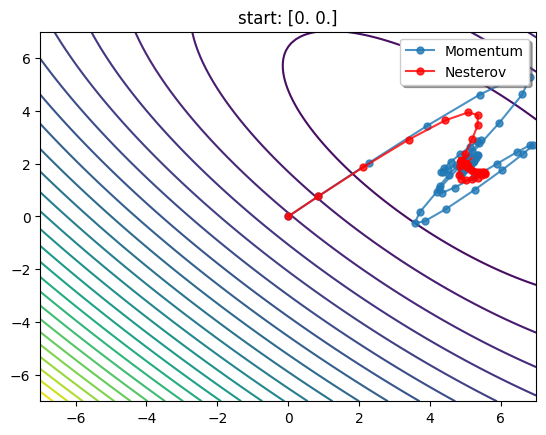

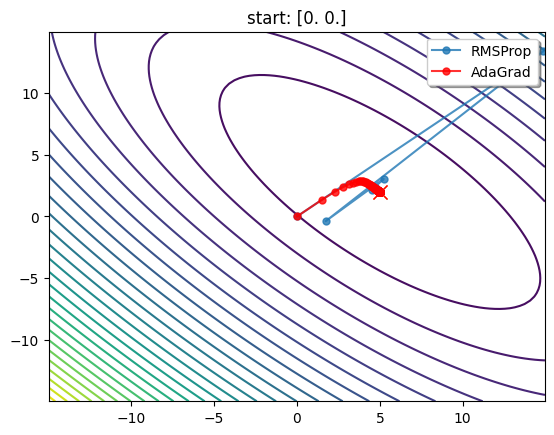

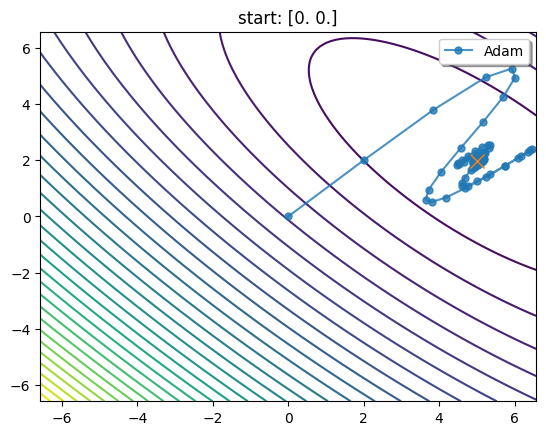

In [10]:
plot_from_start([0, 0])

start: [-1, 2]
Momentum:
[4.99991026 1.98477433] 1.0445438605794282
gradient calculations: 270
function calculations: 0
start: [-1, 2]
Nesterov:
[4.99990872 1.98477327] 1.044543860577613
gradient calculations: 133
function calculations: 0
start: [-1, 2]
AdaGrad:
[4.99988764 1.98479373] 1.0445438606669075
gradient calculations: 204
function calculations: 0
start: [-1, 2]
RMSProp:
[4.99990819 1.98477378] 1.04454386057801
gradient calculations: 57
function calculations: 0
start: [-1, 2]
Adam:
[4.99990545 1.98477137] 1.0445438605858914
gradient calculations: 270
function calculations: 0


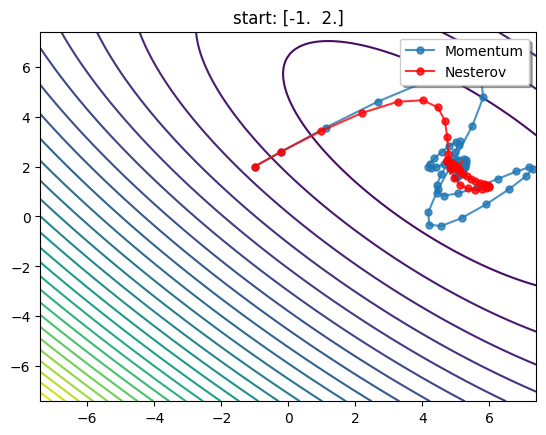

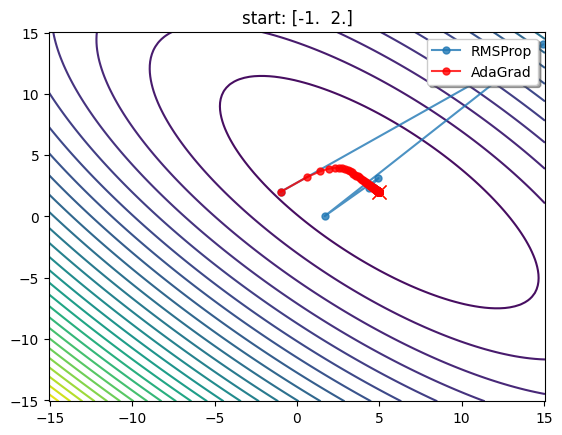

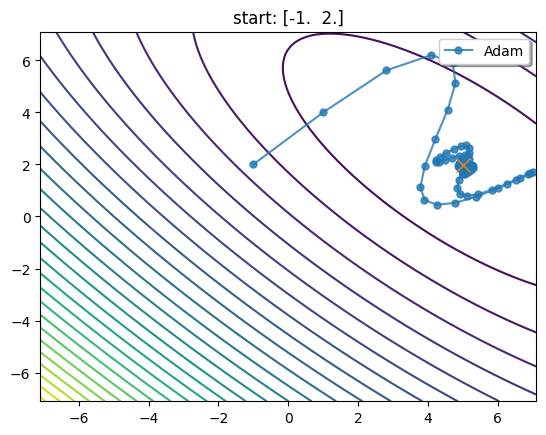

In [11]:
plot_from_start([-1, 2])

start: [-0.5, -1]
Momentum:
[4.99991523 1.98477232] 1.044543860586289
gradient calculations: 257
function calculations: 0
start: [-0.5, -1]
Nesterov:
[4.99990981 1.9847722 ] 1.0445438605770996
gradient calculations: 133
function calculations: 0
start: [-0.5, -1]
AdaGrad:
[4.99987289 1.98480806] 1.0445438608191875
gradient calculations: 290
function calculations: 0
start: [-0.5, -1]
RMSProp:
[4.99990768 1.98477427] 1.0445438605784734
gradient calculations: 53
function calculations: 0
start: [-0.5, -1]
Adam:
[4.99991768 1.98477837] 1.0445438606342559
gradient calculations: 253
function calculations: 0


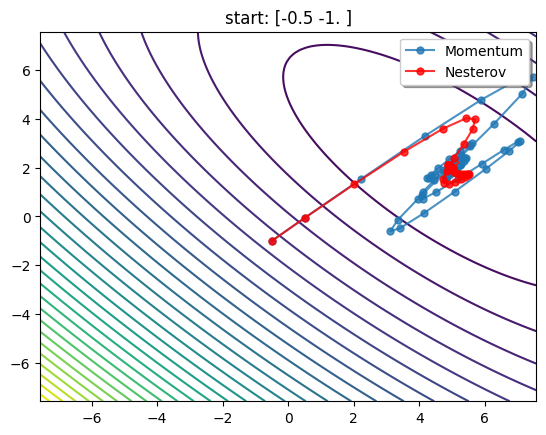

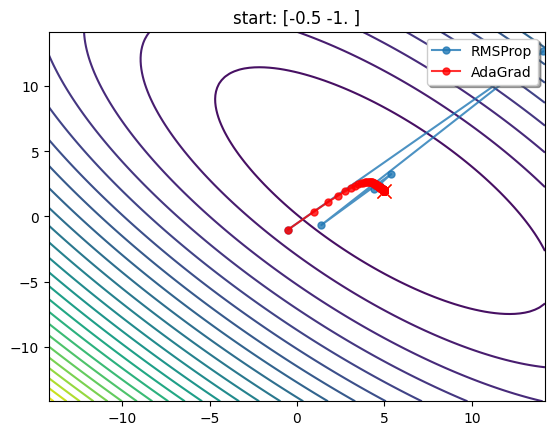

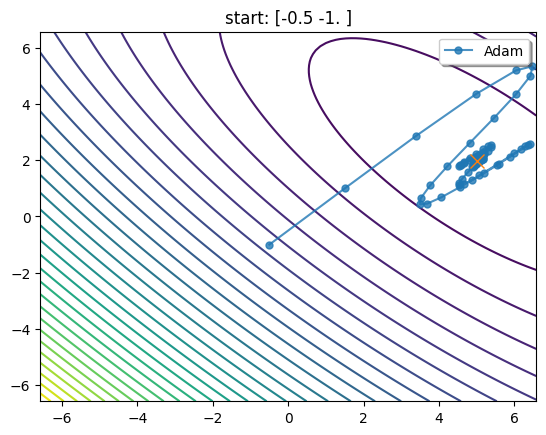

In [12]:
plot_from_start([-0.5, -1])

start: [-0.5, 0]
Momentum:
[4.99991561 1.9847713 ] 1.044543860584863
gradient calculations: 257
function calculations: 0
start: [-0.5, 0]
Nesterov:
[4.9999095 1.9847725] 1.0445438605772044
gradient calculations: 133
function calculations: 0
start: [-0.5, 0]
AdaGrad:
[4.99987838 1.98480272] 1.0445438607537891
gradient calculations: 252
function calculations: 0
start: [-0.5, 0]
RMSProp:
[4.99990804 1.98477392] 1.0445438605781332
gradient calculations: 55
function calculations: 0
start: [-0.5, 0]
Adam:
[4.99990965 1.98476681] 1.0445438605867878
gradient calculations: 269
function calculations: 0


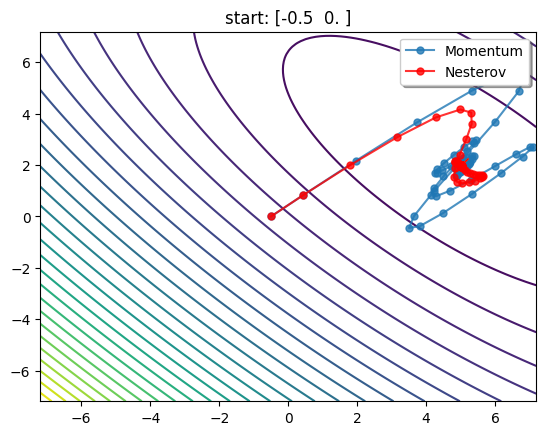

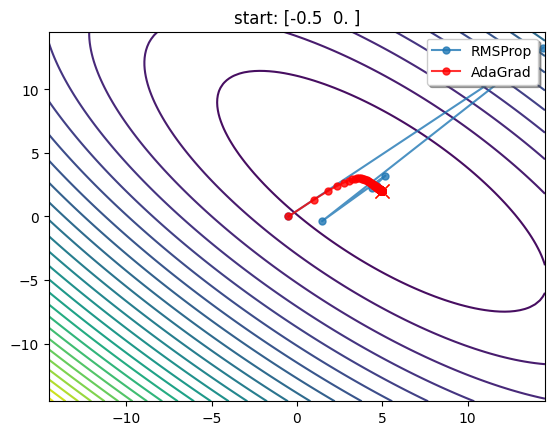

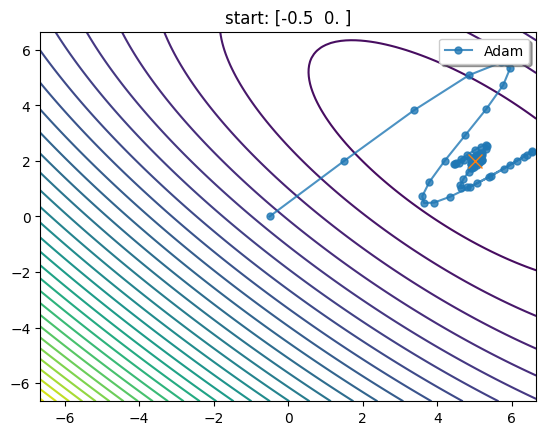

In [13]:
plot_from_start([-0.5, 0])

start: [2, 3]
Momentum:
[4.99991218 1.98477541] 1.044543860586355
gradient calculations: 232
function calculations: 0
start: [2, 3]
Nesterov:
[4.99990937 1.98477263] 1.0445438605772592
gradient calculations: 133
function calculations: 0
start: [2, 3]
AdaGrad:
[4.99990474 1.98477713] 1.0445438605829138
gradient calculations: 64
function calculations: 0
start: [2, 3]
RMSProp:
[4.99991371 1.98476842] 1.0445438605785722
gradient calculations: 64
function calculations: 0
start: [2, 3]
Adam:
[4.99992058 1.98477345] 1.0445438606209088
gradient calculations: 240
function calculations: 0


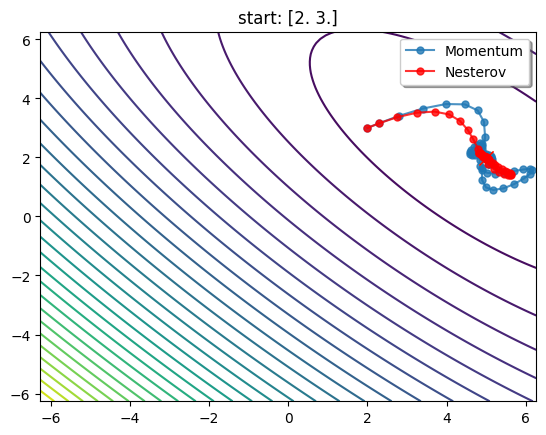

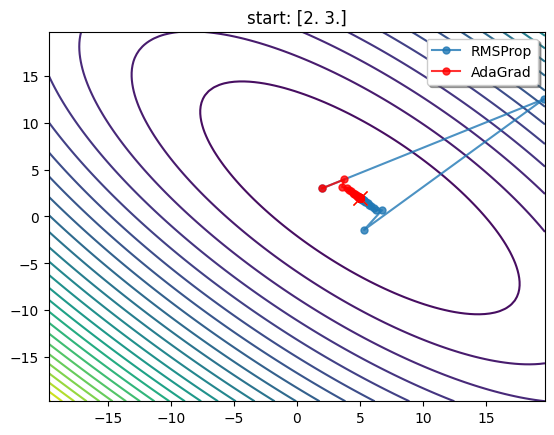

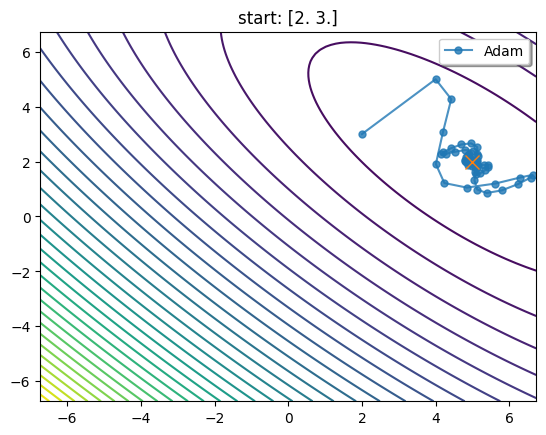

In [14]:
plot_from_start([2, 3])

start: [-10, 0]
Momentum:
[4.99990529 1.98477234] 1.0445438605841906
gradient calculations: 276
function calculations: 0
start: [-10, 0]
Nesterov:
[4.9999081  1.98477386] 1.0445438605780806
gradient calculations: 168
function calculations: 0
start: [-10, 0]
AdaGrad:
[4.99978354 1.98489482] 1.0445438633213315
gradient calculations: 974
function calculations: 0
start: [-10, 0]
RMSProp:
[4.99990826 1.98477371] 1.0445438605779493
gradient calculations: 57
function calculations: 0
start: [-10, 0]
Adam:
[4.99990489 1.98477309] 1.0445438605839998
gradient calculations: 286
function calculations: 0


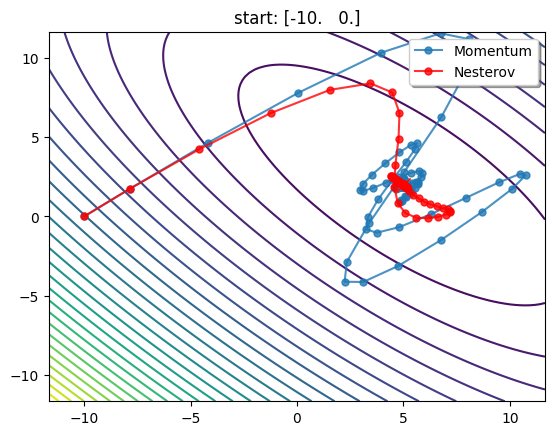

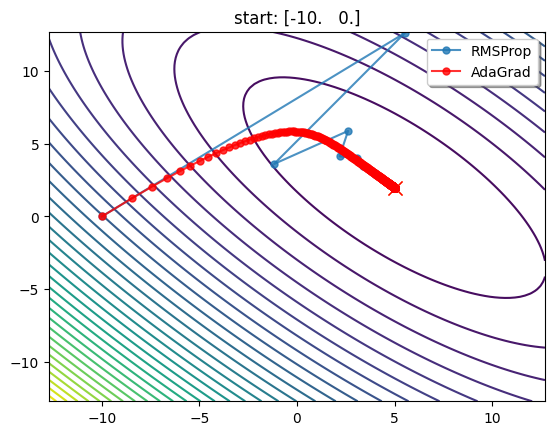

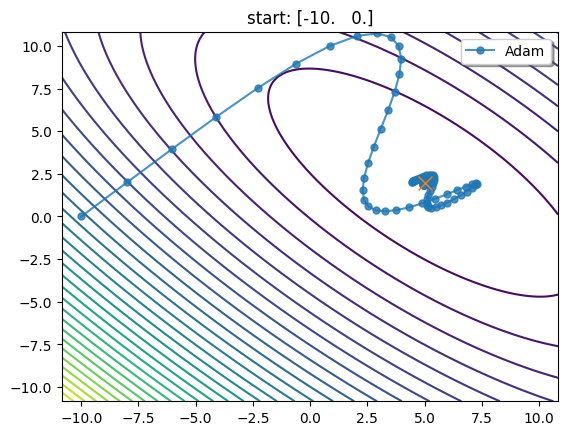

In [15]:
plot_from_start([-10, 0])

start: [0.9504983984550248, -0.766835117539493]
Momentum:
[4.99991381 1.98477264] 1.044543860582758
gradient calculations: 257
function calculations: 0
start: [0.9504983984550248, -0.766835117539493]
Nesterov:
[4.9999102  1.98477182] 1.0445438605770132
gradient calculations: 133
function calculations: 0
start: [0.9504983984550248, -0.766835117539493]
AdaGrad:
[4.99988345 1.9847978 ] 1.0445438607026518
gradient calculations: 201
function calculations: 0
start: [0.9504983984550248, -0.766835117539493]
RMSProp:
[4.99990823 1.98477374] 1.0445438605779753
gradient calculations: 52
function calculations: 0
start: [0.9504983984550248, -0.766835117539493]
Adam:
[4.99991519 1.98477438] 1.0445438605935635
gradient calculations: 264
function calculations: 0


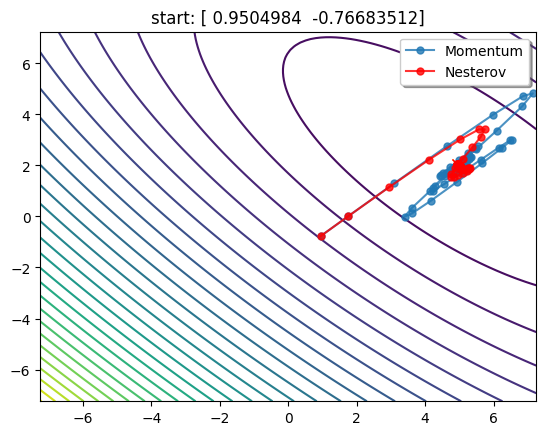

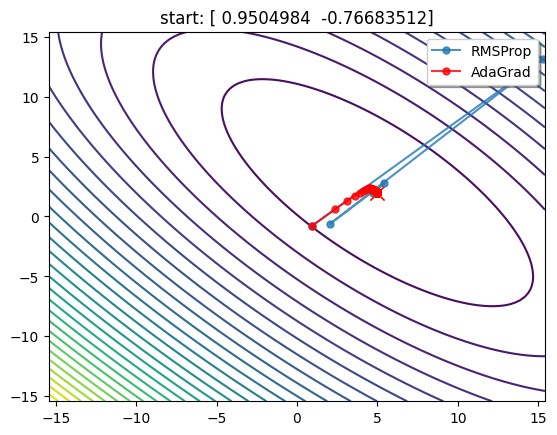

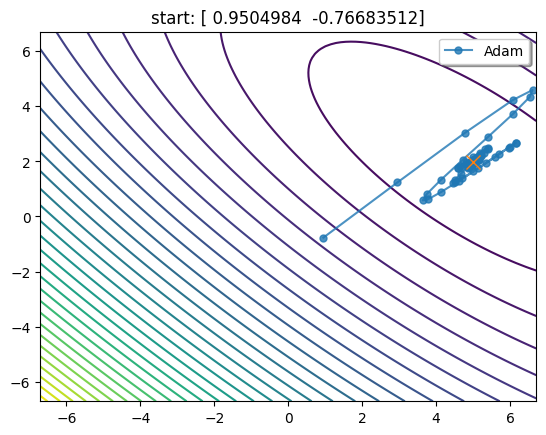

In [16]:
plot_from_start([0.9504983984550248, -0.766835117539493])

In [17]:
#generate 4 dots
dots = plotter.generate_n_dots(4)

start: [-0.05085864262290385, 0.31494500531451064]
Momentum:
[4.99991527 1.98477116] 1.0445438605834634
gradient calculations: 257
function calculations: 0
start: [-0.05085864262290385, 0.31494500531451064]
Nesterov:
[4.99990955 1.98477246] 1.0445438605771868
gradient calculations: 133
function calculations: 0
start: [-0.05085864262290385, 0.31494500531451064]
AdaGrad:
[4.99988433 1.98479695] 1.044543860694655
gradient calculations: 218
function calculations: 0
start: [-0.05085864262290385, 0.31494500531451064]
RMSProp:
[4.99990801 1.98477396] 1.0445438605781663
gradient calculations: 55
function calculations: 0
start: [-0.05085864262290385, 0.31494500531451064]
Adam:
[4.99991166 1.98477651] 1.0445438605888406
gradient calculations: 268
function calculations: 0


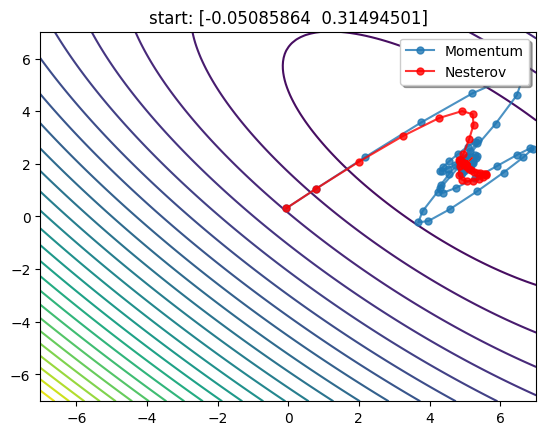

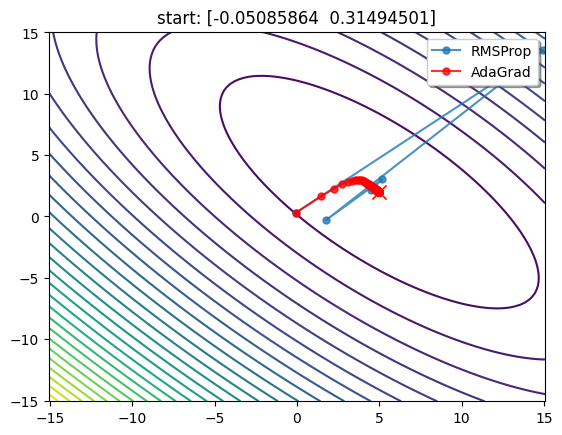

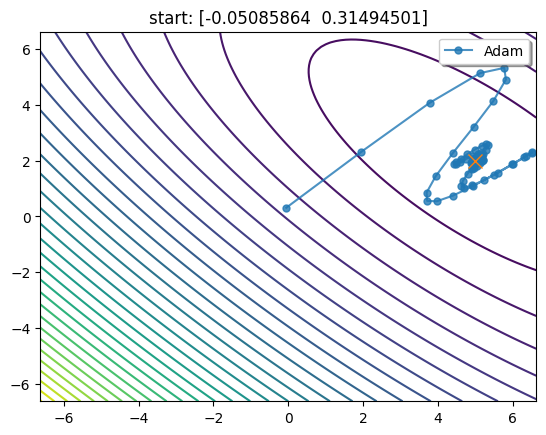

start: [0.3328209422496762, -0.7147992941492645]
Momentum:
[4.99991447 1.98477235] 1.0445438605839215
gradient calculations: 257
function calculations: 0
start: [0.3328209422496762, -0.7147992941492645]
Nesterov:
[4.99990999 1.98477203] 1.0445438605770534
gradient calculations: 133
function calculations: 0
start: [0.3328209422496762, -0.7147992941492645]
AdaGrad:
[4.99988017 1.98480098] 1.0445438607347184
gradient calculations: 233
function calculations: 0
start: [0.3328209422496762, -0.7147992941492645]
RMSProp:
[4.999908   1.98477396] 1.0445438605781654
gradient calculations: 53
function calculations: 0
start: [0.3328209422496762, -0.7147992941492645]
Adam:
[4.99990861 1.98476722] 1.0445438605885229
gradient calculations: 268
function calculations: 0


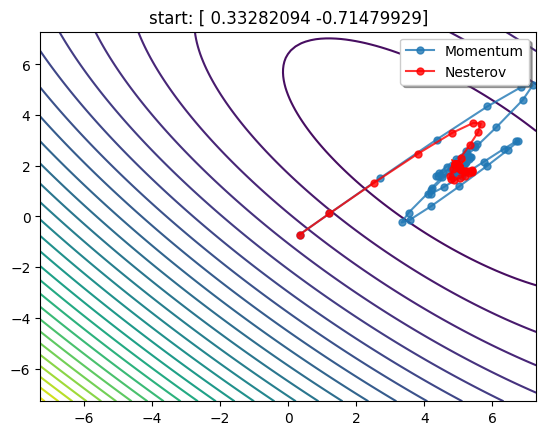

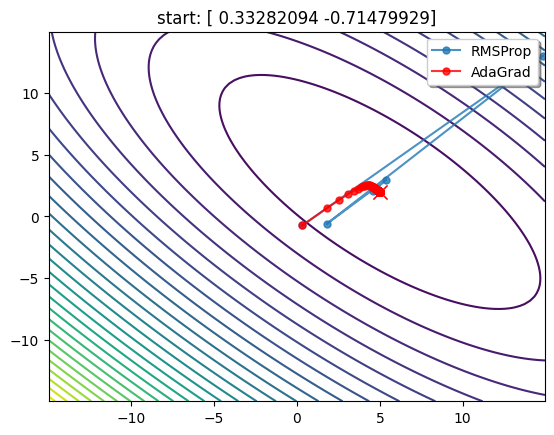

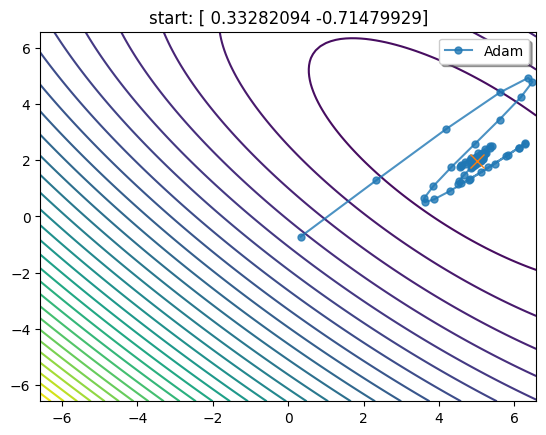

start: [-0.9782791138198641, -0.25049101587327116]
Momentum:
[4.99991602 1.98477138] 1.0445438605864
gradient calculations: 257
function calculations: 0
start: [-0.9782791138198641, -0.25049101587327116]
Nesterov:
[4.99990942 1.98477258] 1.0445438605772344
gradient calculations: 133
function calculations: 0
start: [-0.9782791138198641, -0.25049101587327116]
AdaGrad:
[4.99987463 1.98480636] 1.0445438607972874
gradient calculations: 289
function calculations: 0
start: [-0.9782791138198641, -0.25049101587327116]
RMSProp:
[4.9999081  1.98477387] 1.0445438605780843
gradient calculations: 55
function calculations: 0
start: [-0.9782791138198641, -0.25049101587327116]
Adam:
[4.99991871 1.98477971] 1.044543860655282
gradient calculations: 250
function calculations: 0


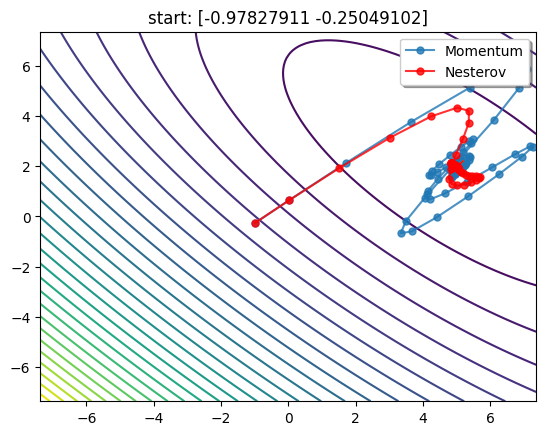

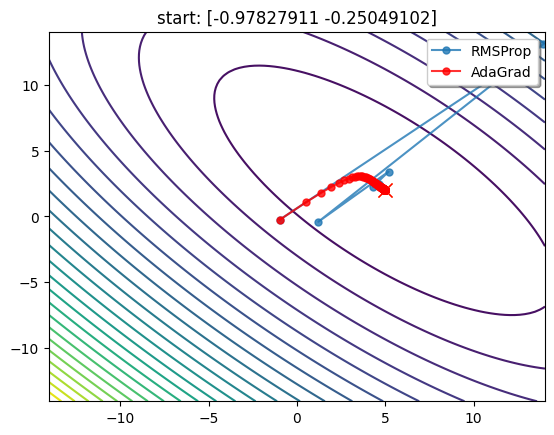

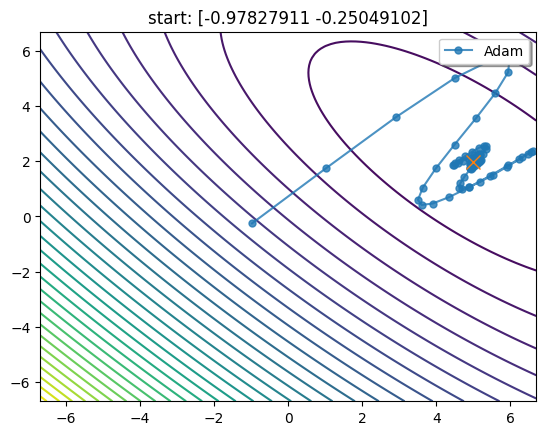

start: [-0.4519037210433372, 0.6206961044701675]
Momentum:
[4.9999158  1.98477069] 1.0445438605840769
gradient calculations: 257
function calculations: 0
start: [-0.4519037210433372, 0.6206961044701675]
Nesterov:
[4.99990932 1.98477268] 1.0445438605772792
gradient calculations: 133
function calculations: 0
start: [-0.4519037210433372, 0.6206961044701675]
AdaGrad:
[4.99988339 1.98479785] 1.044543860703137
gradient calculations: 227
function calculations: 0
start: [-0.4519037210433372, 0.6206961044701675]
RMSProp:
[4.99990826 1.98477371] 1.0445438605779462
gradient calculations: 56
function calculations: 0
start: [-0.4519037210433372, 0.6206961044701675]
Adam:
[4.99991115 1.98477661] 1.0445438605877064
gradient calculations: 269
function calculations: 0


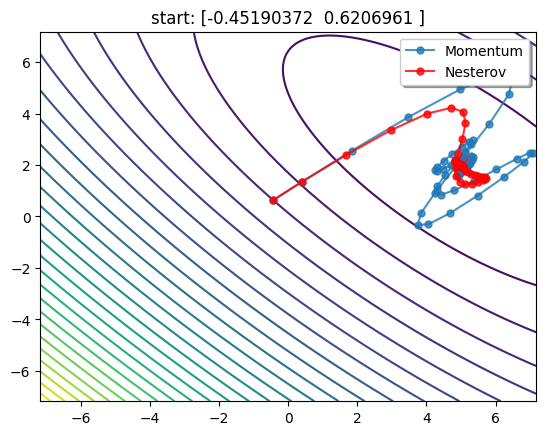

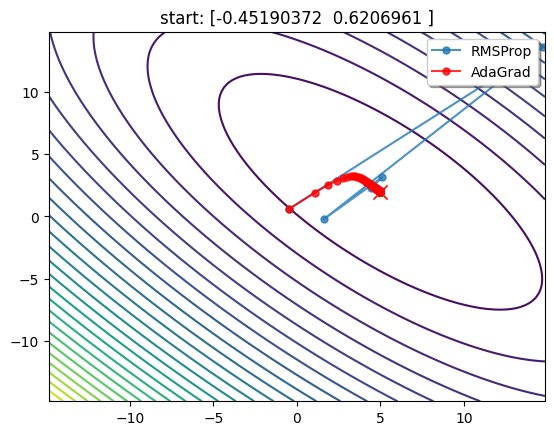

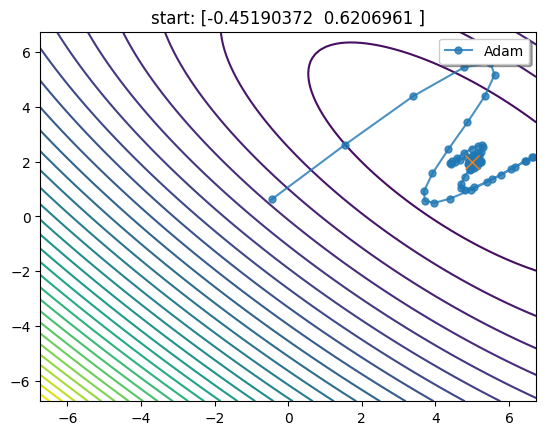

In [18]:
for i in dots:
    plot_from_start(i)
